In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
data = load_wine()

In [78]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data['target']

In [79]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [80]:
X = df[['alcohol', 'malic_acid']]
y = df['target']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [82]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 2, 1, 0, 0, 0, 0, 2])

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  3],
       [ 3, 16,  2],
       [ 4,  2,  8]])

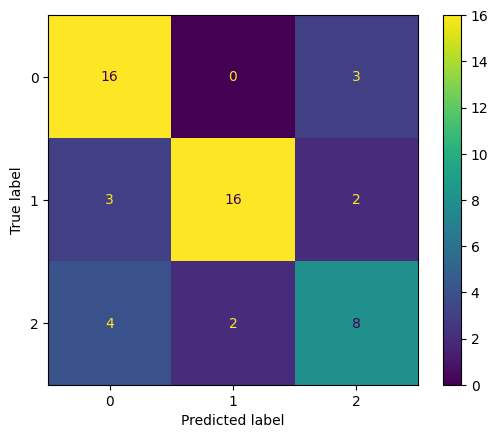

In [85]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        19
           1       0.89      0.76      0.82        21
           2       0.62      0.57      0.59        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.75      0.74      0.74        54



In [87]:
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


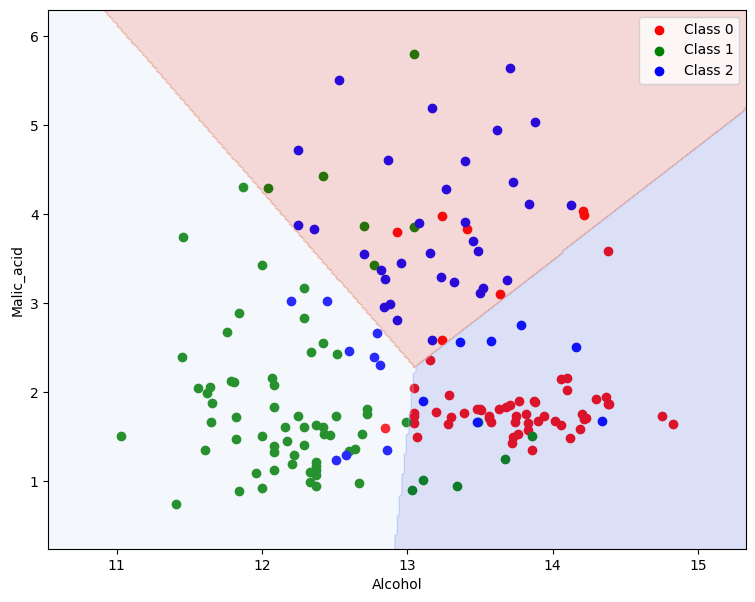

In [88]:
plt.figure(figsize = (9, 7))
# Plotting data points
plt.scatter(df[df['target'] == 0]['alcohol'], df[df['target'] == 0]['malic_acid'], color = 'red', label = 'Class 0')
plt.scatter(df[df['target'] == 1]['alcohol'], df[df['target'] == 1]['malic_acid'], color = 'green', label = 'Class 1')
plt.scatter(df[df['target'] == 2]['alcohol'], df[df['target'] == 2]['malic_acid'], color = 'blue', label = 'Class 2')
# Creating Decision Boundary(Margin)
x_min, x_max = X['alcohol'].min() - 0.5, X['alcohol'].max() + 0.5
y_min, y_max = X['malic_acid'].min() - 0.5, X['malic_acid'].max() + 0.5

# Creating Points using meshgrid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Converting xx, yy into 1d array and then combining it to get (x,y) points for prediction
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.2, cmap = 'coolwarm')

plt.xlabel('Alcohol')
plt.ylabel('Malic_acid')
plt.legend()
plt.show()

In [89]:
df = pd.DataFrame({
    'Experience' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary' : [15000, 20000, 23000, 25000, 30000, 40000, 45000, 60000, 90000, 120000]
})
df.head()

,Experience,Salary
0,1,15000
1,2,20000
2,3,23000
3,4,25000
4,5,30000


In [90]:
X = df[['Experience']]
y = df['Salary']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [92]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
X_test

,Experience
8,9
1,2
5,6


In [94]:
y_pred = model.predict(X_test)
y_pred

array([82725.24752475,  9623.76237624, 51396.03960396])

In [95]:
y_pred

array([82725.24752475,  9623.76237624, 51396.03960396])

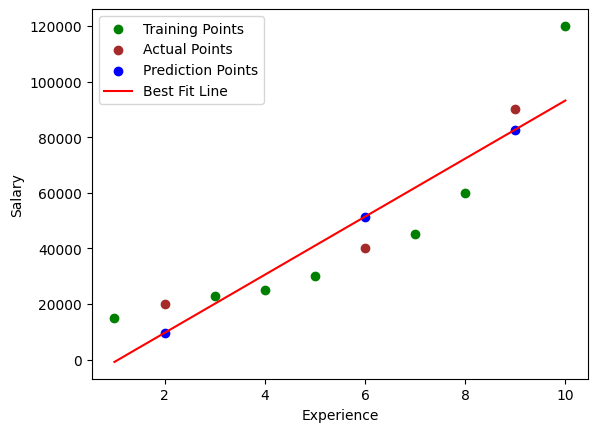

In [96]:
plt.scatter(X_train, y_train, color = 'green', label = 'Training Points')
plt.scatter(X_test, y_test, color = 'brown', label = 'Actual Points')
plt.scatter(X_test, y_pred, color = 'blue', label = 'Prediction Points')
plt.plot(X, model.predict(X), color = 'red', label = 'Best Fit Line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [97]:
df = pd.DataFrame({
    'Experience' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary' : [15000, 20000, 23000, 25000, 30000, 40000, 45000, 60000, 90000, 120000]
})
df.head()

,Experience,Salary
0,1,15000
1,2,20000
2,3,23000
3,4,25000
4,5,30000


In [98]:
X = df[['Experience']]
y = df['Salary']

In [99]:
X_poly = PolynomialFeatures(degree = 2)
X_poly = X_poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [100]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [101]:
y_pred = model.predict(X_poly)
y_pred

array([ 21481.81818182,  17875.75757576,  17731.81818182,  21050.        ,
        27830.3030303 ,  38072.72727273,  51777.27272727,  68943.93939394,
        89572.72727273, 113663.63636364])

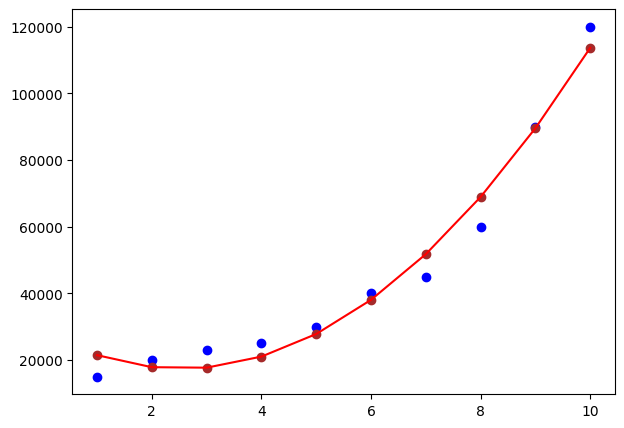

In [102]:
plt.figure(figsize = (7, 5))
plt.scatter(X, y, color = 'blue', label = 'Actual Data Points')
plt.scatter(X, y_pred, color = 'brown', label = 'Predicted Data Points')
plt.plot(X, y_pred, color = 'red', label = 'Best Fit Line')
plt.show()

In [103]:
df = pd.DataFrame({
    'Area' : [1100, 1600, 1800, 2300, 3300, 3700, 4200, 4300, 5500, 6000],
    'Bedrooms' : [2, 3, 3, 4, 4, 5, 5, 5, 6, 6],
    'Price' : [130000, 220000, 230000, 265000, 325000, 385000, 415000, 420000, 409000, 520000]
})

In [104]:
X = df[['Area', 'Bedrooms']]
y = df['Price']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_pred = model.predict(X_test)
y_pred

array([507805.61837876, 204955.95762409, 384459.58814427])

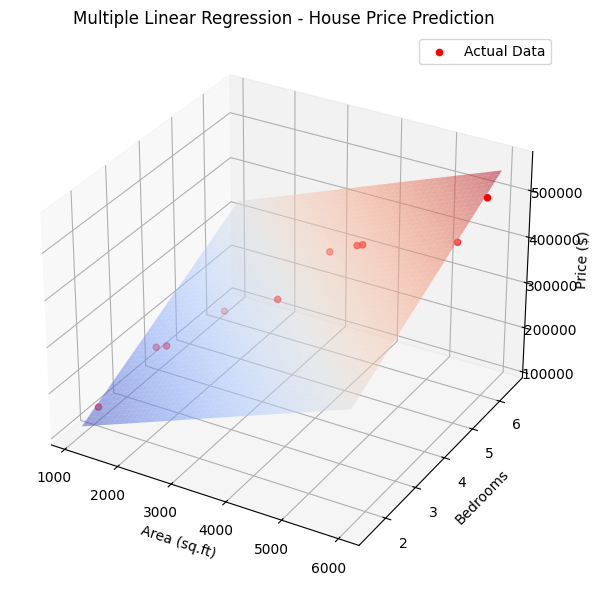

In [108]:
# Create Margin
x_min, x_max = X['Area'].min() - 0.5, X['Area'].max() + 0.5
y_min, y_max = X['Bedrooms'].min() - 0.5, X['Bedrooms'].max() + 0.5
# Create Mesh Grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

# Actual Data Points
ax.scatter(df['Area'], df['Bedrooms'], df['Price'], color = 'red', label = 'Actual Data')
# Regression Plane
ax.plot_surface(xx, yy, Z, alpha = 0.5, cmap = 'coolwarm')
# Labels
ax.set_xlabel('Area (sq.ft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price ($)')
ax.set_title('Multiple Linear Regression - House Price Prediction')
ax.legend()
plt.tight_layout()
plt.show()

In [149]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
X = df.drop(columns = ['species'])
y = df['species']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [152]:
label_enc = LabelEncoder()
y_train_enc = label_enc.fit_transform(y_train)
y_test_enc = label_enc.transform(y_test)

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [154]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaled, y_train_enc)

KNeighborsClassifier(n_neighbors=3)

In [155]:
y_pred = model.predict(X_test_scaled)
y_pred

array([2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])

In [156]:
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



In [116]:
df = pd.read_excel(r'D:\SEMESTER 5\INT 234 - PREDICTIVE ANALYSIS\Machine Learning GitHub\Machine_Learning_Revision\Datasets\spam dataset.xlsx')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
df = df.rename(columns = {'v1' : 'Label',
                          'v2' : 'Message'})

In [118]:
X = df['Message']
y = df['Label']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [120]:
y_train

6      ham
40     ham
41     ham
46     ham
15    spam
9     spam
16     ham
24     ham
33     ham
30     ham
0      ham
43     ham
32     ham
5     spam
29     ham
11    spam
36     ham
1      ham
21     ham
2     spam
37     ham
35     ham
23     ham
39     ham
10     ham
22     ham
18     ham
48     ham
20     ham
7      ham
42    spam
14     ham
28     ham
38     ham
Name: Label, dtype: object

In [121]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [122]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [123]:
y_pred = model.predict(X_test_cv)
y_pred

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'ham', 'ham'], dtype='<U4')

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92        11
        spam       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15



In [125]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0],
       [ 2,  2]])

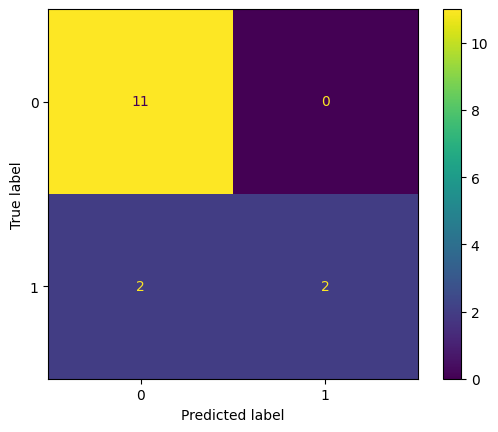

In [126]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [127]:
data = load_iris()

In [128]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data['target']

In [129]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [130]:
X = df.drop(columns = ['target', 'petal length (cm)', 'petal width (cm)'])
y = df['target']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [132]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [133]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



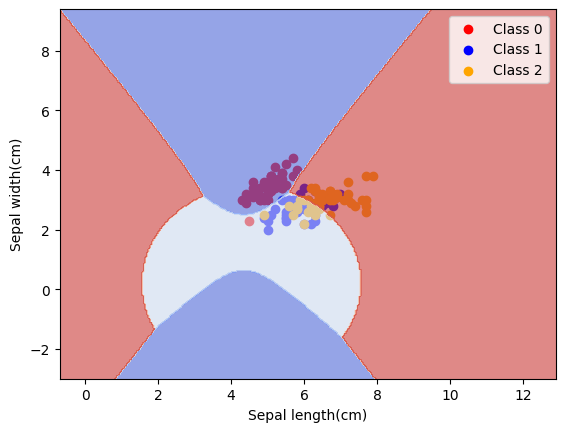

In [135]:
# Plot Points
plt.scatter(df[df['target'] == 0]['sepal length (cm)'], df[df['target'] == 0]['sepal width (cm)'], color = 'red', label = 'Class 0')
plt.scatter(df[df['target'] == 1]['sepal length (cm)'], df[df['target'] == 1]['sepal width (cm)'], color = 'blue', label = 'Class 1')
plt.scatter(df[df['target'] == 2]['sepal length (cm)'], df[df['target'] == 2]['sepal width (cm)'], color = 'orange', label = 'Class 2')
# Create Margin
x_min, x_max = X['sepal length (cm)'].min() - 5, X['sepal length (cm)'].max() + 5
y_min, y_max = X['sepal width (cm)'].min() - 5, X['sepal width (cm)'].max() + 5
# Create Meshgrid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
# Converting xx and yy into 1D array and then combining it
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap = 'coolwarm', alpha = 0.6)

plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.legend()
plt.show()

In [136]:
data = load_iris()

In [137]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [138]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [139]:
X = df.copy()

In [140]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [141]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [142]:
X_df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [143]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


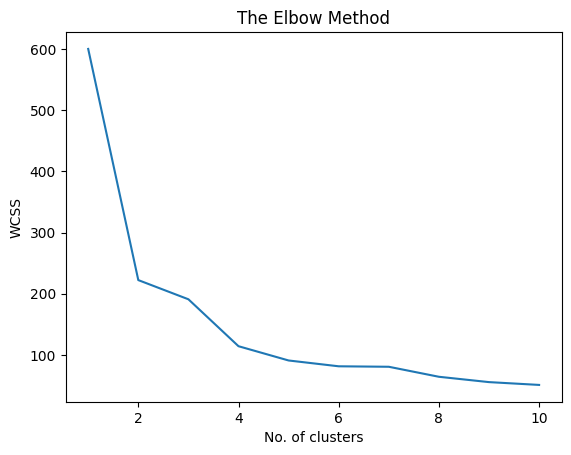

In [144]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    comp = kmeans.inertia_
    wcss.append(comp)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [145]:
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [146]:
X_df['cluster_label'] = model.labels_

In [147]:
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_label
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1


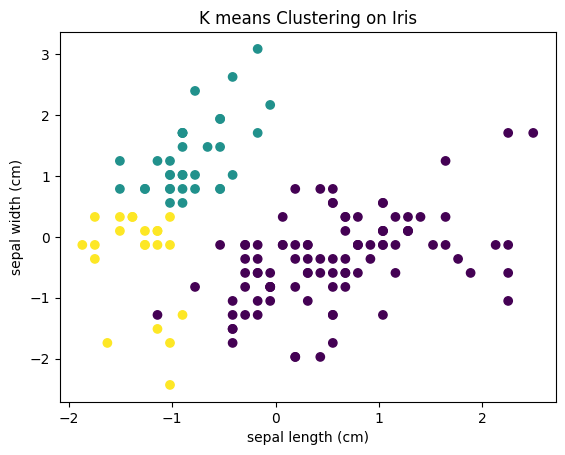

In [157]:
plt.scatter(x = X_df['sepal length (cm)'], y = X_df['sepal width (cm)'], c = X_df['cluster_label'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('K means Clustering on Iris')
plt.show()